In [ ]:

# load the dataset at ../data/HR_comma_sep.csv, inspect it with .head(), .info() and .describe().
# Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
# Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
# convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using pd.concat.
# do the usual train/test split with a 20% test size
# play around with learning rate and optimizer
# check the confusion matrix, precision and recall
# check if you still get the same results if you use a 5-Fold cross validation on all the data
# Is the model good enough for your boss?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [19]:
df.left.value_counts()/len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA33812BE0>,
      dtype=object)

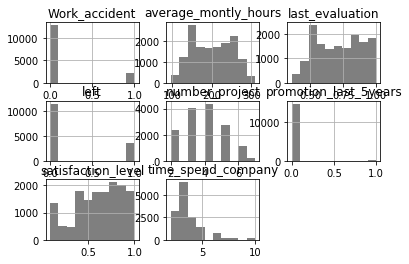

In [9]:
# 1.2 Plot Histogram for each feature
df.hist(color='k', alpha=0.5, bins=10)

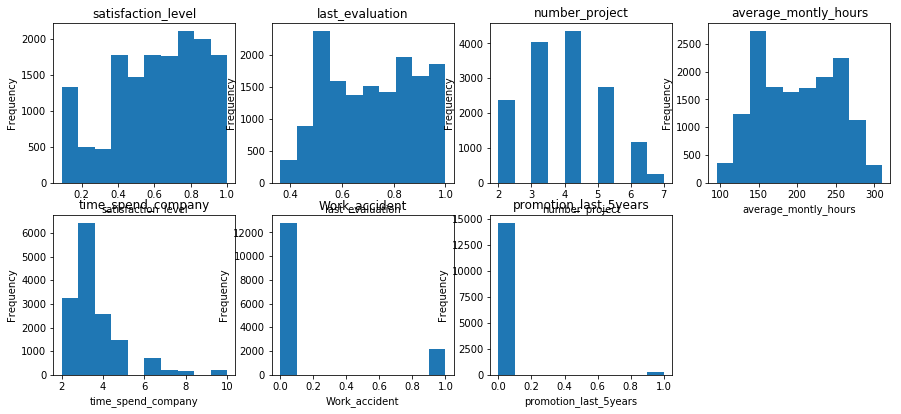

In [27]:
### plot the histograms for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df[factors].columns):
    plt.subplot(3, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [31]:
# feature scaling
df['average_montly_hours_100']=df['average_montly_hours']/100.0

In [32]:
# convert the categorical features into binary dummy columns.
# You will then have to combine them with
# the numerical features using `pd.concat`.
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [34]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [35]:
factors = ['satisfaction_level','last_evaluation','number_project','average_montly_hours_100',
           'time_spend_company','Work_accident','promotion_last_5years']

In [38]:
X = pd.concat([df[factors],df_dummies], axis=1).values

In [41]:
y = df['left'].values

In [42]:
X.shape

(14999, 20)

In [43]:
y.shape

(14999,)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [54]:
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [60]:
y_test_pred=model.predict_classes(X_test)

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
confusion_matrix(y_test, y_test_pred)

array([[2245,   57],
       [ 593,  105]], dtype=int64)

In [64]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [65]:
pretty_confusion_matrix(y_test, y_test_pred, labels = ['Stay','Leave'])

,Predicted Stay,Predicted Leave
Stay,2245,57
Leave,593,105


In [68]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      2302
           1       0.65      0.15      0.24       698

   micro avg       0.78      0.78      0.78      3000
   macro avg       0.72      0.56      0.56      3000
weighted avg       0.76      0.78      0.73      3000



In [69]:
from keras.wrappers.scikit_learn import KerasClassifier

In [73]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [74]:
from sklearn.model_selection import cross_val_score, KFold

In [75]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7373 ± 0.0762


In [76]:
# The cross validation accuracy is 0.7373 ± 0.0762  is similar to the benchmark, where we assume everybody is going to stay
0    0.761917
1    0.238083